In [1]:
import pandas as pd
from BOCC import BOCC, load_clusters
import matplotlib.pyplot as plt
import networkx as nx
import os
import obonet
import pandas as pd
import typing
import numpy as np
import kneed

/Users/michael/miniconda3/envs/bocc/lib/python3.10/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (5.1.0)/charset_normalizer (2.0.9) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
def remove_borders(ax, top=False, bottom=True, left=True, right=False):
    ax.spines['top'].set_visible(top)
    ax.spines['bottom'].set_visible(bottom)
    ax.spines['left'].set_visible(left)
    ax.spines['right'].set_visible(right)

In [3]:
# load HPO
url = 'https://raw.githubusercontent.com/obophenotype/human-phenotype-ontology/master/hp.obo'
graph = obonet.read_obo(url)
print(graph.nodes(data=True)['HP:0001250']['name'])

Seizure


In [4]:
# G21 = nx.read_edgelist('../Edgelists/String_HPO_2021.phenotypic_branch.edgelist.txt')
G22 = nx.read_edgelist('../Edgelists/String_HPO_2022.phenotypic_branch.edgelist.txt')

# Load all the clusters
coms_dict = {}
for dir in os.listdir('../SubComs'):
    if dir in ['2022']:
        for f in os.listdir('../SubComs/{}'.format(dir)):
            if 'paris' in f:
                coms_dict[f.replace('.coms.txt','')] = load_clusters('../SubComs/{}/{}'.format(dir,f))

In [5]:
# load the HPO to Gene edges based on drug info
drug_edges = []
for line in open('../Resources/new_drug_edges_sampled.txt','r'):
    row = line.strip().split('\t')
    drug_edges.append(row)

In [8]:
if not os.path.exists('drug_gene_pheno_counts.theraputic.csv'):
    drug_df_t = pd.read_csv('../Resources/new_drug_edges_sampled.txt',sep='\t',header=None)
    drug_df_t.columns = ['hpo','gene','drug']
    drug_counts_dict_t = {'drug':list(drug_df_t['drug'].unique()),'hpo':[],'gene':[]}
    drug_counts_dict_t['gene'] = [ len(list(drug_df_t[drug_df_t['drug'] == d]['gene'].unique())) for d in drug_counts_dict_t['drug']]
    drug_counts_dict_t['hpo'] = [ len(list(drug_df_t[drug_df_t['drug'] == d]['hpo'].unique())) for d in drug_counts_dict_t['drug']]
    drug_counts_df_t = pd.DataFrame(drug_counts_dict_t)
else:
    drug_counts_df_t = pd.read_csv('drug_gene_pheno_counts.theraputic.csv')
print(drug_counts_df_t)

ValueError: Length mismatch: Expected axis has 2 elements, new values have 3 elements

In [7]:
if not os.path.exists('drug_gene_pheno_counts.csv'):
    drug_df = pd.read_csv('../Resources/drug_edges.txt',sep='\t',header=None)
    drug_df.columns = ['hpo','gene','drug']
    drug_counts_dict = {'drug':list(drug_df['drug'].unique()),'hpo':[],'gene':[]}
    drug_counts_dict['gene'] = [ len(list(drug_df[drug_df['drug'] == d]['gene'].unique())) for d in drug_counts_dict['drug']]
    drug_counts_dict['hpo'] = [ len(list(drug_df[drug_df['drug'] == d]['hpo'].unique())) for d in drug_counts_dict['drug']]
    drug_counts_df = pd.DataFrame(drug_counts_dict)
else:
    drug_counts_df = pd.read_csv('drug_gene_pheno_counts.csv')
print(drug_counts_df)

          drug  hpo  gene
0      C534883   33     4
1      C534422   20     2
2      C496879   65     7
3      C553100   15     6
4      C013759    3     1
...        ...  ...   ...
11867  D015049   42     6
11868  C030940    4     1
11869  C510150   33     8
11870  D015054  329   155
11871  C015582    3     1

[11872 rows x 3 columns]


In [ ]:
drug_counts_df.to_csv('drug_gene_pheno_counts.csv',index=False)
def plot_scatter(df, x, y, name):
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    ax[0, 0].hist(df[x],bins=100)
    ax[1, 0].scatter(df[x], df[y],s=1,alpha=.4)
    ax[1, 1].hist(df[y],orientation='horizontal',bins=100)
    ax[0, 1].axis('off')
    remove_borders(ax[0,0])
    remove_borders(ax[1,0])
    remove_borders(ax[1,1])
    ax[0,0].set_ylabel('Count')
    ax[1,1].set_xlabel('Count')
    ax[1,0].set_ylabel(y)
    ax[1,0].set_xlabel(x)
    plt.savefig(name)
    plt.show()
plot_scatter(drug_counts_df,'gene','hpo', '../Figures/ctd_drug_gene_hpo_scatter.png')
print(drug_counts_df['gene'].median())
print(drug_counts_df['hpo'].median())
print(drug_counts_df.sort_values('gene'))

In [ ]:
drug_counts_df_t.to_csv('drug_gene_pheno_counts.theraputic.csv',index=False)

plot_scatter(drug_counts_df_t,'gene','hpo', '../Figures/ctd_drug_gene_hpo_scatter.theraputic.png')
print(drug_counts_df_t['gene'].median())
print(drug_counts_df_t['hpo'].median())
print(drug_counts_df_t.sort_values('gene'))
print(drug_counts_df_t.sort_values('hpo'))

In [ ]:
# Create list of drug edges that do not already exist in the network
know_drug_edges = []
new_drug_edges = []
for edge in drug_edges:
    if G22.has_edge(edge[0],edge[1]):
        know_drug_edges.append(edge)
    else:
        new_drug_edges.append(edge)
print('Number of know drug edges',len(know_drug_edges))
print('Number of unknow drug edges',len(new_drug_edges))

## What is the distribution of drug degrees?

In [ ]:
# number of drug edges per gene
print(drug_edges[:10])
g2ps = {}
for edge in drug_edges:
    if edge[1] not in g2ps:
        g2ps[edge[1]] = []
    g2ps[edge[1]].append(edge[0])
g2p_counts = { gene:len(g2ps[gene]) for gene in g2ps.keys()}

In [ ]:
fig, ax = plt.subplots()
ax.hist(g2p_counts.values(),bins=100)
ax.set_yscale('log')
ax.set_ylabel('count')
ax.set_xlabel('HPO terms per gene')
remove_borders(ax)
plt.savefig('../Figures/ctd_gene2hpo_hist.png')
plt.show()

In [ ]:
plt.hist([x for x in g2p_counts.values() if x < 25000],bins=100)
plt.yscale('log')
plt.title('Phenotypes per Gene < 25000')
plt.ylabel('count')
plt.xlabel('P per G')
plt.show()

In [ ]:
plt.hist([x for x in g2p_counts.values() if x < 1000],bins=100)
plt.yscale('log')
plt.title('Phenotypes per Gene < 1000')
plt.ylabel('count')
plt.xlabel('P per G')
plt.show()
print(sum(g2p_counts.values()) /len(g2p_counts))
print('# > than 1000',len([x for x in g2p_counts.values() if x > 1000]))
print('# < than 1000',len([x for x in g2p_counts.values() if x < 1000]))
print('# < than 200',len([x for x in g2p_counts.values() if x < 200]))
print(len(g2p_counts))

In [ ]:
# number of edges < X
xs = [10,100,200,300,400,500,600,700,800,900,1000,1500,2000,2500,3000,3500,4000,5000,6000,7000,8000,9000,10000,12000,14000,16000,18000,20000,25000]
ys = []
y2s = []
for x in xs:
    values = [v for v in g2p_counts.values() if v < x]
    ys.append(sum(values)) 
    y2s.append(len(values))
 

In [ ]:

plt.plot(xs,ys)
plt.ylabel('# edges')
plt.xlabel('gene with < X HPOs')
plt.show()

plt.plot(xs,y2s)
plt.ylabel('# genes')
plt.xlabel('gene with < X HPOs')
plt.show()

print(len(g2p_counts))


In [ ]:
kl = kneed.KneeLocator(xs, y2s, curve="concave")
kl.plot_knee()
print(kl.knee)
plt.show()

In [ ]:
xs = [10,100,150,200,300,400,500,600,700,800,900,1000,1500,2000,2500,3000,3500,4000,5000]
ys = []
y2s = []
for x in xs:
    values = [v for v in g2p_counts.values() if v < x]
    ys.append(sum(values)) 
    y2s.append(len(values))
    print(x, ys[-1], y2s[-1])
plt.plot(xs,ys)
plt.ylabel('# edges')
plt.xlabel('gene with < X HPOs')
plt.show()

plt.plot(xs,y2s)
plt.ylabel('# genes')
plt.xlabel('gene with < X HPOs')
plt.show()

xs = [10,20,30,40,50,60,70,80,90,100,150,200,300,400,500]
ys = []
y2s = []
for x in xs:
    values = [v for v in g2p_counts.values() if v < x]
    ys.append(sum(values)) 
    y2s.append(len(values))
    print(x, ys[-1], y2s[-1])
plt.plot(xs,ys)
plt.axvline(x=150,color='red')
plt.ylabel('# edges')
plt.xlabel('gene with < X HPOs')
plt.show()

plt.plot(xs,y2s)
plt.axvline(x=150,color='red')
plt.ylabel('# genes')
plt.xlabel('gene with < X HPOs')
plt.show()

plt.hist([v for v in g2p_counts.values() if v < 500],bins=20)
plt.axvline(x=150,color='red')
plt.xlabel('HPOs per Gene')
plt.ylabel('Count')
plt.show()


novel_ctd_150_edges = []
known_ctd_150_edges = []
total = 0
for g in g2ps.keys():
    if len(g2ps[g]) < 150:
        for h in g2ps[g]:
            total += 1
            if G22.has_edge(g, h):
                known_ctd_150_edges.append([g,h])
            else:
                novel_ctd_150_edges.append([g,h])
print('# novel < 150', len(novel_ctd_150_edges))
print('# known < 150', len(known_ctd_150_edges))
print('total',total)

In [ ]:
# Plot the distribution of Ps to Gs in the 2022 g2p edge list
g2p_22_g2ps = {}
for line in open('../g2p_Edgelists/String_HPO_2022.phenotypic_branch.g2p_edgelist.txt','r'):
    row = line.strip().split('\t')
    if 'HP:' in row[0]:
        h = row[0]
        g = row[1]
    else:
        h = row[1]
        g = row[0]
    if g not in g2p_22_g2ps:
        g2p_22_g2ps[g] = []
    g2p_22_g2ps[g].append(h)
g2p_22_counts = { g:len(g2p_22_g2ps[g]) for g in g2p_22_g2ps.keys()}

In [ ]:
plt.hist(g2p_22_counts.values(),bins=20)
plt.title('2022 g2p edgelist')
plt.xlabel('HPOs per Gene')
plt.ylabel('Count')
plt.show()

xs = [10,20,30,40,50,60,70,80,90,100,150,200,300,400,500,600]
ys = []
y2s = []
for x in xs:
    values = [v for v in g2p_22_counts.values() if v < x]
    ys.append(sum(values)) 
    y2s.append(len(values))
    print(x, ys[-1], y2s[-1])
plt.plot(xs,ys)
plt.title('2022 g2p edgelist')
plt.ylabel('# edges')
plt.xlabel('gene with < X HPOs')
plt.show()

plt.plot(xs,y2s)
plt.title('2022 g2p edgelist')
plt.ylabel('# genes')
plt.xlabel('gene with < X HPOs')
plt.show()

In [ ]:
uniq_g2p_values = {}
new_edges = []
with open('../Resources/drug_edges.unique.novel.txt','w') as outfile:
    for line in open('../Resources/drug_edges.unique.txt','r'):
        h,g = line.strip().split('\t')
        if not G22.has_edge(g,h):
            new_edges.append([g,h])
            outfile.write('{}\t{}\n'.format(g,h))
        if g not in uniq_g2p_values:
            uniq_g2p_values[g] = []
        uniq_g2p_values[g].append(h)
uniq_g2p_counts = { g:len(uniq_g2p_values[g]) for g in uniq_g2p_values.keys()}
print(len(new_edges))

In [ ]:
plt.hist(uniq_g2p_counts.values(),bins=25)
plt.yscale('log')
plt.show()

## Figures

In [ ]:
fig, axes = plt.subplots(1,3)
fig.set_size_inches(16, 5)

axes[0].hist(g2p_counts.values(),bins=100)
axes[0].set_yscale('log')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('HPO terms per gene')
axes[0].set_title('A', loc='left')
remove_borders(axes[0])

axes[1].hist([v for v in g2p_counts.values() if v < 500],bins=20)
axes[1].axvline(x=150,color='red', linestyle='--')
axes[1].set_title('B', loc='left')
axes[1].set_xlabel('HPO terms per gene')
axes[1].set_ylabel('Count')
remove_borders(axes[1])

axes[2].hist(g2p_22_counts.values(),bins=20)
axes[2].set_xlabel('HPO terms per gene')
axes[2].set_title('C', loc='left')
axes[2].set_ylabel('Count')
remove_borders(axes[2])

plt.savefig('../Figures/ctd_gene2hpo_vs_2022.png')
plt.show()

print(max(g2p_counts.values()))
print(max(g2p_22_counts.values()))
g2p_max = max(g2p_counts.values())
print([x for x in g2p_counts.keys() if g2p_counts[x] == g2p_max])

In [ ]:
# {101:['paris.censa.2021:1:SEMA4A,HP:0000128']} patient_id:list of ids of com this patient was solved by:gene,HPO
rediscovered_drug_interactions = []

# is this pid's pairs in any of the coms?
for pair in new_drug_edges:
    # for each community sets keys are in formatted like 'paris.cesna.2021'
    for k in coms_dict.keys():
        if '2022' not in k:
            continue
        for com in coms_dict[k]:
            if pair[0] in com.members and pair[1] in com.members:
                cluster_uid = '{cluster_set}:{cluster_id}'.format(cluster_set=k, cluster_id=str(com.name))
                res_string = '{pid} & {cluster_set}:{cluster_id} & {node1} & {node2} & {hpo_name} & {rank} \\\\'.format(cluster_set=k,
                                                                                                      cluster_id=str(com.name),
                                                                                                      node1=pair[0],
                                                                                                      node2=pair[1],
                                                                                                      hpo_name=graph.nodes(data=True)[pair[0]]['name'],
                                                                                                              #rank=com_percentile_map[cluster_uid],
                                                                                                              rank='TBD',
                                                                                                              pid=pair[2])
#                 print(res_string)
                rediscovered_drug_interactions.append(res_string)



print('Number of Rediscovered Drug Interactions', len(rediscovered_drug_interactions)) 



## Snowballing Results

['paris', 'cesna']
0.9996319082925803
['paris', 'greedy']
0.9974391805377721
['paris', 'infomap']
0.9987393633785061
['paris', 'walktrap']
0.9961759082217974


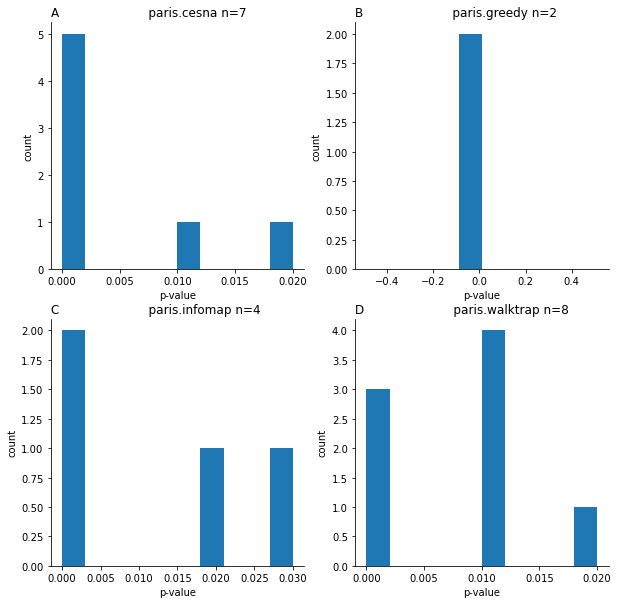

In [80]:
fig, axes = plt.subplots(2,2)
fig.set_size_inches(10, 10)
ax_labels = [['A','B'],['C','D']]
drug_discovery_df = None
for i,f in enumerate(os.listdir('../DrugRediscoveryResults/')):
    name = '{}.{}.{}:{}'.format(f.split('.')[2],f.split('.')[3],f.split('.')[4].split('_')[2],'')
    x = int(i/2)
    y = i % 2
    tmp_df = pd.read_csv('../DrugRediscoveryResults/' + f,sep='\t',header=None)
    tmp_df.columns = ['cid','pvalue']
    tmp_df['uid'] = [name + str(x) for x in tmp_df['cid']]
#     print(tmp_df)
    sub = tmp_df[tmp_df['pvalue'] < 1]
    print(f.split('.')[2:4])
    print(sum(tmp_df['pvalue'] == 1) / tmp_df.shape[0])
    leq_1 = sum(tmp_df['pvalue'] != 1)
    axes[x,y].hist(sub['pvalue'])
    axes[x,y].set_xlabel('p-value')
    axes[x,y].set_ylabel('count')
    axes[x,y].set_title(ax_labels[x][y] + '                       ' + '.'.join(f.split('.')[2:4]) + ' n={}'.format(str(leq_1)),loc='left')
    remove_borders(axes[x,y])
    if drug_discovery_df is None:
        drug_discovery_df = tmp_df
    else:
        drug_discovery_df = pd.concat([drug_discovery_df,tmp_df])
plt.show()


['paris', 'walktrap']
0.9969578444154715
['paris', 'infomap']
0.9985310319500551
['paris', 'greedy']
0.9958949096880131
['paris', 'cesna']
0.9997737983034872


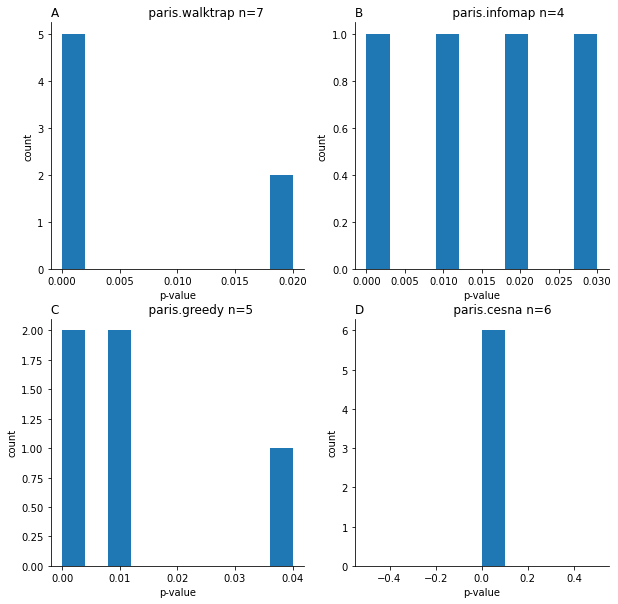

In [81]:
fig, axes = plt.subplots(2,2)
fig.set_size_inches(10, 10)
ax_labels = [['A','B'],['C','D']]
drug_discovery_df_21 = None
for i,f in enumerate(os.listdir('../DrugRediscoveryResults2021/')):
    name = '{}.{}.{}:{}'.format(f.split('.')[2],f.split('.')[3],f.split('.')[4].split('_')[2],'')
    x = int(i/2)
    y = i % 2
    tmp_df = pd.read_csv('../DrugRediscoveryResults2021/' + f,sep='\t',header=None)
    tmp_df.columns = ['cid','pvalue']
    tmp_df['uid'] = [name + str(x) for x in tmp_df['cid']]
#     print(tmp_df)
    sub = tmp_df[tmp_df['pvalue'] < 1]
    print(f.split('.')[2:4])
    print(sum(tmp_df['pvalue'] == 1) / tmp_df.shape[0])
    leq_1 = sum(tmp_df['pvalue'] != 1)
    axes[x,y].hist(sub['pvalue'])
    axes[x,y].set_xlabel('p-value')
    axes[x,y].set_ylabel('count')
    axes[x,y].set_title(ax_labels[x][y] + '                       ' + '.'.join(f.split('.')[2:4]) + ' n={}'.format(str(leq_1)),loc='left')
    remove_borders(axes[x,y])
    if drug_discovery_df_21 is None:
        drug_discovery_df_21 = tmp_df
    else:
        drug_discovery_df_21 = pd.concat([drug_discovery_df_21,tmp_df])
plt.show()

In [82]:
print(drug_discovery_df)

cluster_p_dict = {}
p_values = []
ranks = []
first = True
for line in open('../../BOCCRank/data-raw/rankings/xgb_cluster_rankings_2022.tsv'.format(y),'r'):
    if first:
        first = False
        continue
    # print(line)
    row = line.strip().split('\t')
    cluster_p_dict[row[0]] = float(row[2])

cluster_p_dict_21 = {}
first = True
for line in open('../../BOCCRank/data-raw/rankings/xgb_cluster_rankings_2021.tsv'.format(y),'r'):
    if first:
        first = False
        continue
    # print(line)
    row = line.strip().split('\t')
    cluster_p_dict_21[row[0]] = float(row[2])

       cid  pvalue                       uid
0        0     1.0        paris.cesna.2022:0
1        1     1.0        paris.cesna.2022:1
2        2     1.0        paris.cesna.2022:2
3        3     1.0        paris.cesna.2022:3
4        4     1.0        paris.cesna.2022:4
...    ...     ...                       ...
2087  2087     1.0  paris.walktrap.2022:2087
2088  2088     1.0  paris.walktrap.2022:2088
2089  2089     1.0  paris.walktrap.2022:2089
2090  2090     1.0  paris.walktrap.2022:2090
2091  2091     1.0  paris.walktrap.2022:2091

[25063 rows x 3 columns]


In [70]:
res_22 = pd.read_csv('../../BOCCRank/data-raw/rankings/xgb_cluster_rankings_2022.tsv',sep='\t')
print(res_22)

                     clusterID  estimated_snowballing_pvalue  rank
0           paris.cesna.2022:4                      0.869315   794
1           paris.cesna.2022:5                      0.332299    85
2          paris.cesna.2022:26                      0.821252   654
3          paris.cesna.2022:27                      0.802521   601
4          paris.cesna.2022:40                      0.983576  1886
...                        ...                           ...   ...
2759  paris.walktrap.2022:1981                      0.992922  2413
2760  paris.walktrap.2022:1983                      0.994580  2556
2761  paris.walktrap.2022:2026                      0.996357  2696
2762  paris.walktrap.2022:2033                      0.619600   323
2763  paris.walktrap.2022:2034                      0.997024  2753

[2764 rows x 3 columns]


       cid  pvalue                       uid
0        0     1.0        paris.cesna.2022:0
1        1     1.0        paris.cesna.2022:1
2        2     1.0        paris.cesna.2022:2
3        3     1.0        paris.cesna.2022:3
4        4     1.0        paris.cesna.2022:4
...    ...     ...                       ...
2087  2087     1.0  paris.walktrap.2022:2087
2088  2088     1.0  paris.walktrap.2022:2088
2089  2089     1.0  paris.walktrap.2022:2089
2090  2090     1.0  paris.walktrap.2022:2090
2091  2091     1.0  paris.walktrap.2022:2091

[25063 rows x 3 columns]


/var/folders/ty/694s8g7n1cz_l5s3prx55jzr0000gn/T/ipykernel_56667/1431295421.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['predicted_rank'] = [cluster_p_dict[x] if x in cluster_p_dict else -1 for x in sub['uid']]


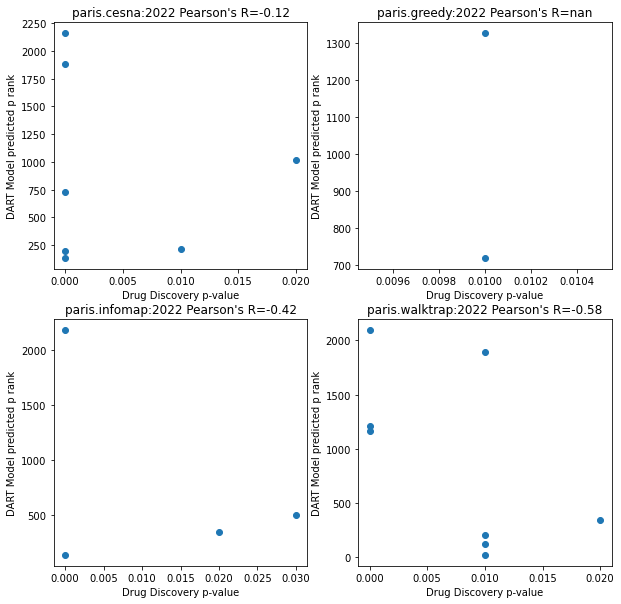

In [84]:
#2022
print(drug_discovery_df)
# cluster_p_dict
fig, axes = plt.subplots(2,2)
fig.set_size_inches(10, 10)
drug_discovery_df['algo'] = [x.split('.2022')[0] for x in drug_discovery_df['uid']]
for i,algo in enumerate(drug_discovery_df['algo'].unique()):
    xi = int(i/2)
    yi = i % 2
    sub = drug_discovery_df[drug_discovery_df['algo'] == algo]
    sub['predicted_rank'] = [cluster_p_dict[x] if x in cluster_p_dict else -1 for x in sub['uid']]
    subsub = sub[sub['predicted_rank'] != -1]
    subsub = subsub[subsub['pvalue'] != 1]
    pearsons_R = subsub['pvalue'].corr(subsub['predicted_rank'])
    axes[xi,yi].scatter(subsub['pvalue'], subsub['predicted_rank'])
    axes[xi,yi].set_xlabel('Drug Discovery p-value')
    axes[xi,yi].set_ylabel('DART Model predicted p rank')
    axes[xi,yi].set_title('{}:2022'.format(algo) + " Pearson's R=" + str(round(pearsons_R, 2)))
plt.show()
    

         cid  pvalue                     uid            algo
0          0     1.0   paris.walktrap.2021:0  paris.walktrap
1          1     1.0   paris.walktrap.2021:1  paris.walktrap
2          2     1.0   paris.walktrap.2021:2  paris.walktrap
3          3     1.0   paris.walktrap.2021:3  paris.walktrap
4          4     1.0   paris.walktrap.2021:4  paris.walktrap
...      ...     ...                     ...             ...
26520  26520     1.0  paris.cesna.2021:26520     paris.cesna
26521  26521     1.0  paris.cesna.2021:26521     paris.cesna
26522  26522     1.0  paris.cesna.2021:26522     paris.cesna
26523  26523     1.0  paris.cesna.2021:26523     paris.cesna
26524  26524     1.0  paris.cesna.2021:26524     paris.cesna

[32767 rows x 4 columns]


/var/folders/ty/694s8g7n1cz_l5s3prx55jzr0000gn/T/ipykernel_56667/3285081193.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['predicted_rank'] = [cluster_p_dict_21[x] if x in cluster_p_dict_21 else -1 for x in sub['uid']]


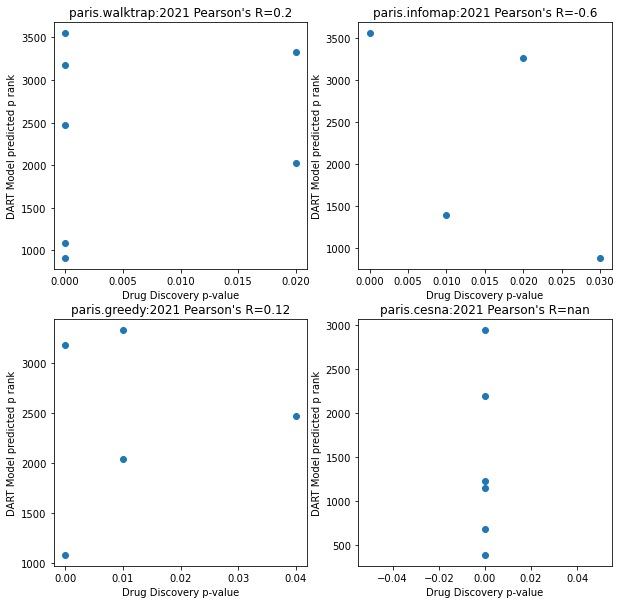

In [85]:
#2021
print(drug_discovery_df_21)
# cluster_p_dict
fig, axes = plt.subplots(2,2)
fig.set_size_inches(10, 10)
drug_discovery_df_21['algo'] = [x.split('.2021')[0] for x in drug_discovery_df_21['uid']]
for i,algo in enumerate(drug_discovery_df_21['algo'].unique()):
    xi = int(i/2)
    yi = i % 2
    sub = drug_discovery_df_21[drug_discovery_df_21['algo'] == algo]
    sub['predicted_rank'] = [cluster_p_dict_21[x] if x in cluster_p_dict_21 else -1 for x in sub['uid']]
    subsub = sub[sub['predicted_rank'] != -1]
    subsub = subsub[subsub['pvalue'] != 1]
    pearsons_R = subsub['pvalue'].corr(subsub['predicted_rank'])
    axes[xi,yi].scatter(subsub['pvalue'], subsub['predicted_rank'])
    axes[xi,yi].set_xlabel('Drug Discovery p-value')
    axes[xi,yi].set_ylabel('DART Model predicted p rank')
    axes[xi,yi].set_title('{}:2021'.format(algo) + " Pearson's R=" + str(round(pearsons_R, 2)))
plt.show()
    

                     clusterID  estimated_snowballing_pvalue  rank
0           paris.cesna.2022:4                      0.869315   794
1           paris.cesna.2022:5                      0.332299    85
2          paris.cesna.2022:26                      0.821252   654
3          paris.cesna.2022:27                      0.802521   601
4          paris.cesna.2022:40                      0.983576  1886
...                        ...                           ...   ...
2759  paris.walktrap.2022:1981                      0.992922  2413
2760  paris.walktrap.2022:1983                      0.994580  2556
2761  paris.walktrap.2022:2026                      0.996357  2696
2762  paris.walktrap.2022:2033                      0.619600   323
2763  paris.walktrap.2022:2034                      0.997024  2753

[2764 rows x 3 columns]


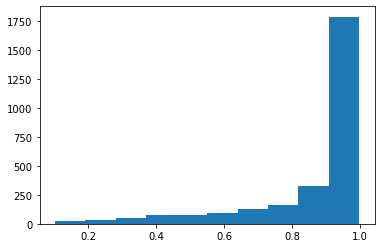

0
0.1011235490441322


In [50]:
# Original XGB scores
old_scores_df = pd.read_csv('../xgb_cluster_rankings_2022.tsv', sep='\t')
print(old_scores_df)
plt.hist(old_scores_df['estimated_snowballing_pvalue'])
plt.show()
print(sum(old_scores_df['estimated_snowballing_pvalue'] < 0.05))
print(min(old_scores_df['estimated_snowballing_pvalue']))

(8138, 39)
Index(['cluster_id', 'cluster_size', 'gene_ratio', 'HPO_ratio',
       'num_sig_go_enrichment_terms', 'sig_go_enrichment_p_vals',
       'sig_go_enrichment_fdr_corrected_p_vals', 'sig_go_enrichment_terms',
       'go_sig_threshold', 'max_norm_cell_type_specificity',
       'max_norm_cell_type_comma_sep_string', 'num_of_diseases',
       'max_norm_disease_specificity', 'max_norm_disease_comma_sep_string',
       'mg2_pairs_count', 'mg2_not_pairs_count',
       'mg2_portion_families_recovered', 'avg_embeddedness',
       'avg_internal_degree', 'conductance', 'cut_ratio', 'normalized_cut',
       'expansion', 'triangle_participation_ratio', 'surprise', 'significance',
       'newman_girvan_modularity', 'internal_edge_density', 'edges_inside',
       'hub_dominance', 'max_plof', 'mean_plof', 'median_plof', 'std_plof',
       'sum_plof', 'snowballing_pvalue', 'num_new_edges_on_any_node', 'year',
       'algo'],
      dtype='object')


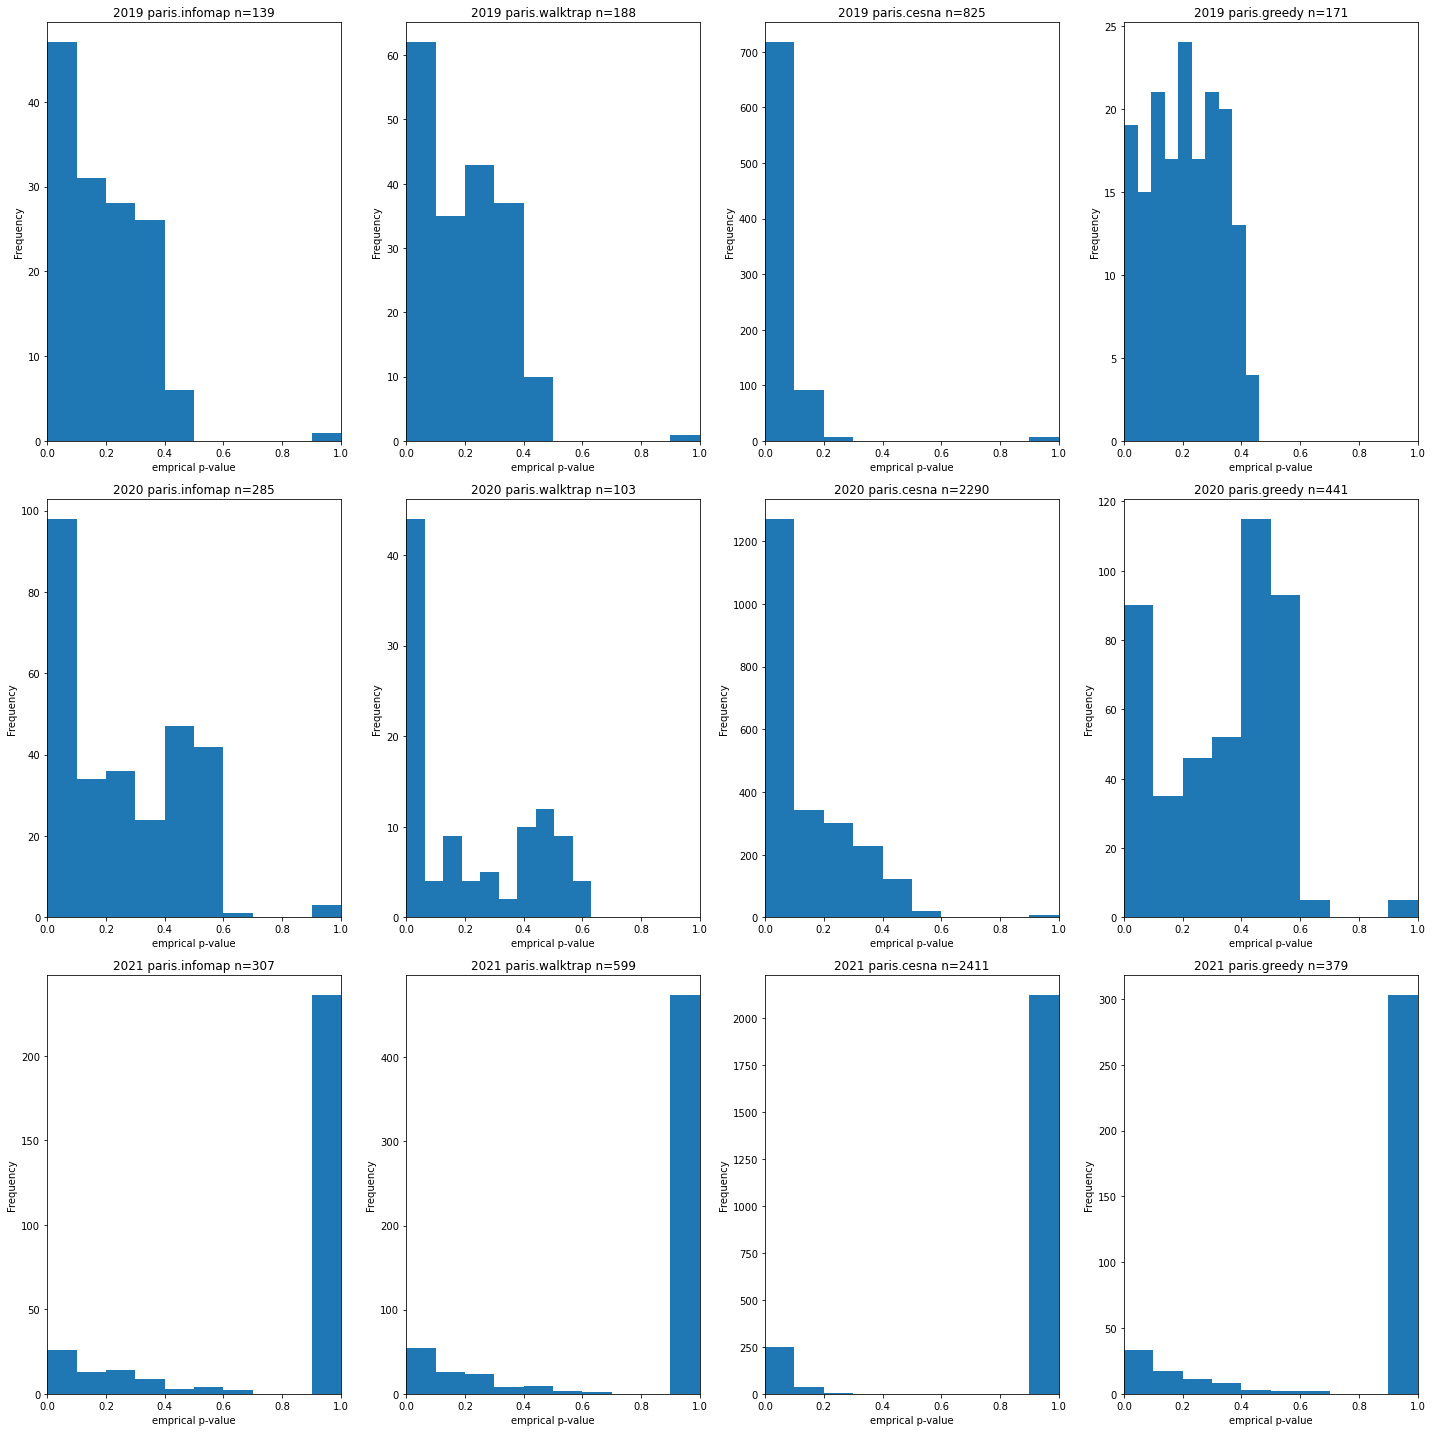

In [69]:
# distribution of P-values trained on in each year
all_bocc_features = None
for year in ['2019','2020','2021']:
    current_dir = '../../BOCCRank/data-raw/features/{}/'.format(year)
    for f in os.listdir(current_dir):
        # if 'tsv' not in f: continue
        name_prefix = '.'.join(f.split('.')[:3]) + ':'
        # print(name_prefix)
        tmp_df = pd.read_csv(current_dir+f,sep='\t')
        # print(tmp_df.columns)
        tmp_df['cluster_id'] = name_prefix + tmp_df['cluster_id'].astype(str)
        # print(tmp_df['cluster_id'])
        tmp_df['year'] = year
        tmp_df['algo'] = '.'.join(f.split('.')[:2])
        # print(tmp_df['cluster_id'])
        # print(tmp_df['algo'])
        if all_bocc_features is None:
            all_bocc_features = tmp_df
        else:
            all_bocc_features = pd.concat([all_bocc_features,tmp_df])
print(all_bocc_features.shape)
print(all_bocc_features.columns)

fig, ax = plt.subplots(3,4)
fig.set_size_inches(20, 20)
for i,year in enumerate(['2019','2020','2021']):
    sub = all_bocc_features[all_bocc_features['year'] == year]
    for j,algo in enumerate(all_bocc_features['algo'].unique()):
        subsub = sub[sub['algo'] == algo]
        ax[i,j].hist(subsub['snowballing_pvalue'])
        ax[i,j].set_title(year + ' ' + algo + ' n={}'.format(str(subsub.shape[0])))
        ax[i,j].set_ylabel('Frequency')
        ax[i,j].set_xlabel('emprical p-value')
        ax[i,j].set_xlim(0,1)
plt.tight_layout()
plt.savefig('../Figures/all_empircal_pvalues_dists.png')
plt.show()

## Non-1 P-values vs Cluster Rank

In [10]:
predicted_df_22 = pd.read_csv('../xgb_cluster_rankings_2022.tsv',sep='\t')
predicted_df_22['percentile'] = [
    sum(predicted_df_22['estimated_snowballing_pvalue'] <= x)/predicted_df_22.shape[0] 
    for x in predicted_df_22['estimated_snowballing_pvalue']]

com_score_map_22 = {r[['clusterID']].values[0]:r[['estimated_snowballing_pvalue']].values[0] for i,r in predicted_df_22.iterrows()}
com_percentile_map_22 = {r[['clusterID']].values[0]:round(r[['percentile']].values[0], 2) for i,r in predicted_df_22.iterrows()}

print(predicted_df_22['clusterID'])

0             paris.cesna.2022:4
1             paris.cesna.2022:5
2            paris.cesna.2022:26
3            paris.cesna.2022:27
4            paris.cesna.2022:40
                  ...           
2759    paris.walktrap.2022:1981
2760    paris.walktrap.2022:1983
2761    paris.walktrap.2022:2026
2762    paris.walktrap.2022:2033
2763    paris.walktrap.2022:2034
Name: clusterID, Length: 2764, dtype: object


/var/folders/ty/694s8g7n1cz_l5s3prx55jzr0000gn/T/ipykernel_56667/1936090789.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['percentile'] = [ com_percentile_map_22[x] if x in com_percentile_map_22 else -1 for x in sub['uid']]


(1817, 4)
(119, 4)
(308, 4)
(510, 4)


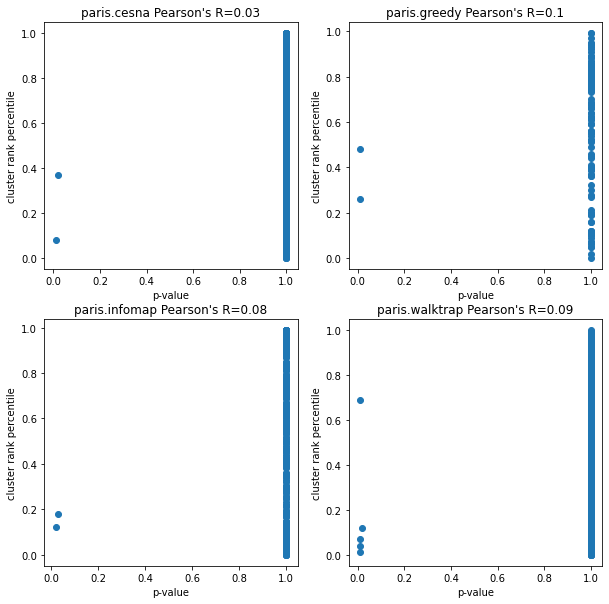

In [17]:
fig, axes = plt.subplots(2,2)
fig.set_size_inches(10, 10)
for i,f in enumerate(os.listdir('../DrugRediscoveryResults/')):
    name = '{}.{}.{}:{}'.format(f.split('.')[2],f.split('.')[3],f.split('.')[4].split('_')[2],'')
#     print(name)
    x = int(i/2)
    y = i % 2
    tmp_df = pd.read_csv('../DrugRediscoveryResults/' + f,sep='\t',header=None)
    tmp_df.columns = ['cid','pvalue']
    tmp_df['uid'] = [name + str(x) for x in tmp_df['cid']]
    tmp_df['pvalue'] = [x for x in tmp_df['pvalue']]
    sub = tmp_df[tmp_df['pvalue'] > 0]
    sub['percentile'] = [ com_percentile_map_22[x] if x in com_percentile_map_22 else -1 for x in sub['uid']]
    sub = sub[sub['percentile'] != -1]
    print(sub.shape)
    pearsons_R = sub['pvalue'].corr(sub['percentile'])
    axes[x,y].scatter(sub['pvalue'], sub['percentile'])
    axes[x,y].set_xlabel('p-value')
    axes[x,y].set_ylabel('cluster rank percentile')
    axes[x,y].set_title('.'.join(f.split('.')[2:4]) + " Pearson's R=" + str(round(pearsons_R, 2)))
#     print()
plt.show()